# 1- Cargando las imágenes

In [1]:
from skimage.io import imread_collection

#path 
col_dir = 'C:\\Users\\nelso\\Google Drive\\JupiterNotebooks\\tesis\\images\\*.png'
#creating a collection with the available images
collection = imread_collection(col_dir)

# 2- Creando matriz de imágenes aplicando la Transformada de Fourier

In [2]:
import numpy as np
from scipy import fftpack

Xff2 = [np.ravel(np.abs(fftpack.fft2(col)))for col in collection] 

# 3- Aplicando PCA

In [3]:
from sklearn.decomposition import PCA

## 3.1- PCA para 2 componentes

In [4]:
pca = PCA(n_components=2, random_state=0)
pcafitXff2 = pca.fit(Xff2)
pcatransformXff2 = pca.fit_transform(Xff2)

## 3.2- PCA para todos los componentes

In [14]:
pcaN = PCA(random_state=0)
pcafitXff2N = pcaN.fit(Xff2)
pcatransformXff2N = pcaN.fit_transform(Xff2)

## 3.3- Graficando PCA para 2 componentes y para todos los componentes

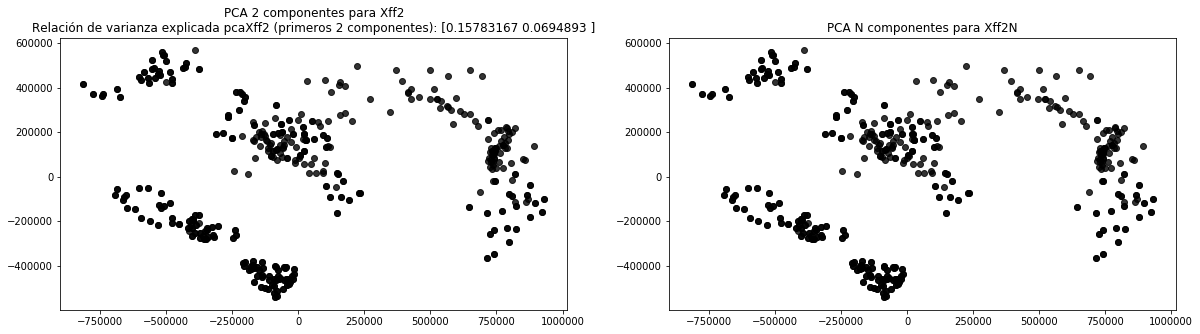

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
# plot the Elbow Method with PCA2**************************************************************
plt.subplot(121)
plt.scatter(pcatransformXff2[:, 0], pcatransformXff2[:, 1], c='black', alpha=.8)
plt.title('PCA 2 componentes para Xff2'+'\n'+'Relación de varianza explicada pcaXff2 (primeros 2 componentes): {}'.format(pcafitXff2.explained_variance_ratio_))
# plot the Elbow Method with PCAN**************************************************************
plt.subplot(122)
plt.scatter(pcatransformXff2N[:, 0], pcatransformXff2N[:, 1], c='black', alpha=.8)
plt.title('PCA N componentes para Xff2N')
plt.show()

## 3.4- Graficando el porcentaje de varianza explicada para todos los componentes

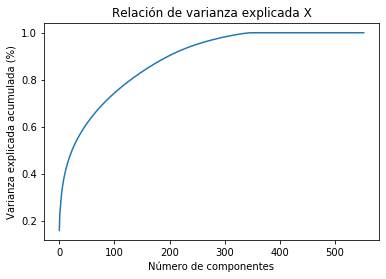

In [17]:
plt.figure()
plt.plot(np.cumsum(pcafitXff2N.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada (%)')
plt.title('Relación de varianza explicada X')
plt.show()

# 4- Aplicando agrupamiento con KMeans

In [18]:
from sklearn.cluster import KMeans

## 4.1- KMeans sobre el resultado de PCA para 2 componentes

In [19]:
# Number of clusters
y_pred2 = KMeans(n_clusters=2, random_state=0)
y_pred21 = y_pred2.fit_predict(pcatransformXff2)
y_pred3 = KMeans(n_clusters=3, random_state=0)
y_pred31 = y_pred3.fit_predict(pcatransformXff2)
y_pred4 = KMeans(n_clusters=4, random_state=0)
y_pred41 = y_pred4.fit_predict(pcatransformXff2)
y_pred5 = KMeans(n_clusters=5, random_state=0)
y_pred51 = y_pred5.fit_predict(pcatransformXff2)

## 4.2- KMeans sobre el resultado de PCA para todos los componentes

In [20]:
# Number of clusters
y_pred2N = KMeans(n_clusters=2, random_state=0)
y_pred21N = y_pred2N.fit_predict(pcatransformXff2N)
y_pred3N = KMeans(n_clusters=3, random_state=0)
y_pred31N = y_pred3N.fit_predict(pcatransformXff2N)
y_pred4N = KMeans(n_clusters=4, random_state=0)
y_pred41N = y_pred4N.fit_predict(pcatransformXff2N)
y_pred5N = KMeans(n_clusters=5, random_state=0)
y_pred51N = y_pred5N.fit_predict(pcatransformXff2N)

## 4.3- Graficando el agrupamiento resultante despúes de aplicar KMeans para diferentes números de clúster

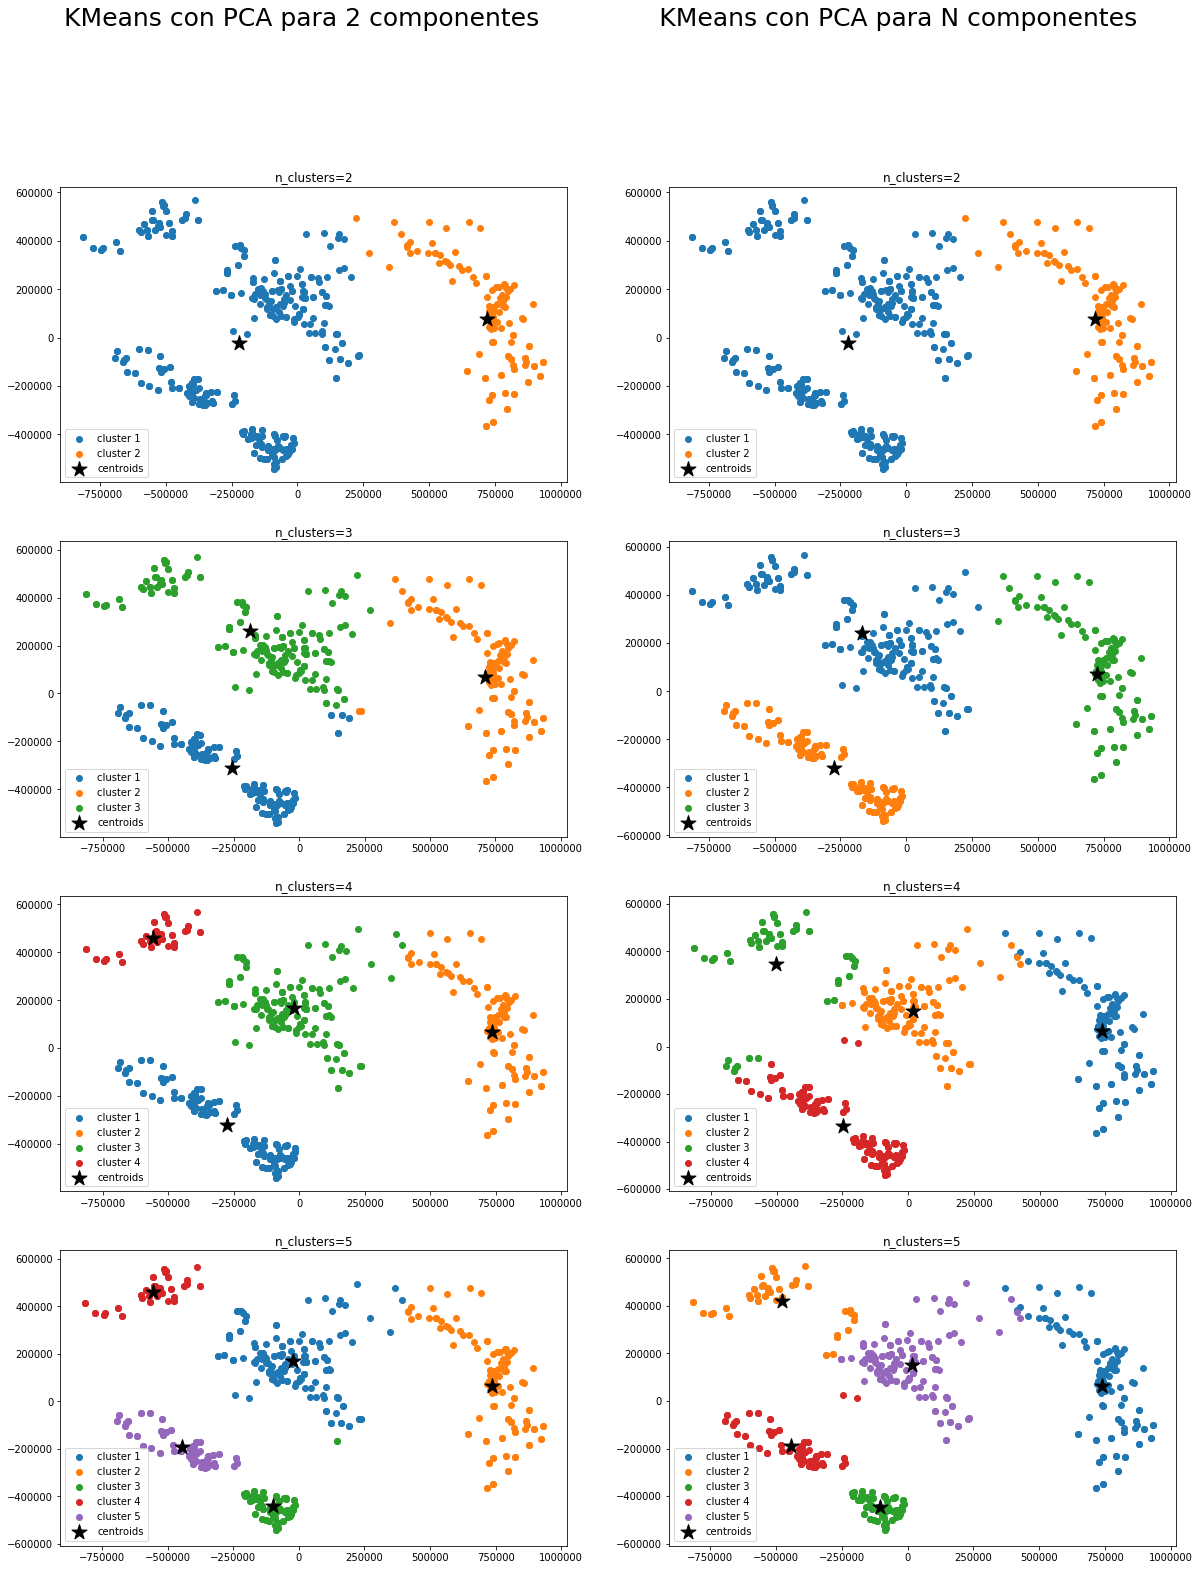

In [21]:
plt.figure(figsize=(20, 25))

# plot the 2 clusters PCA2**************************************************************
plt.subplot(421)
plt.scatter(
    pcatransformXff2[y_pred21 == 0, 0], pcatransformXff2[y_pred21 == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2[y_pred21 == 1, 0], pcatransformXff2[y_pred21 == 1, 1],
    label='cluster 2'
)
# plot the centroids
plt.scatter(
    y_pred2.cluster_centers_[:, 0], y_pred2.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=2")

# plot the 2 clusters PCAN**************************************************************
plt.subplot(422)
plt.scatter(
    pcatransformXff2N[y_pred21N == 0, 0], pcatransformXff2N[y_pred21N == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2N[y_pred21N == 1, 0], pcatransformXff2N[y_pred21N == 1, 1],
    label='cluster 2'
)
# plot the centroids
plt.scatter(
    y_pred2N.cluster_centers_[:, 0], y_pred2N.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=2")
#*************************************************************************************************************************************************************************************************
# plot the 3 clusters PCA2**************************************************************
plt.subplot(423)
plt.scatter(
    pcatransformXff2[y_pred31 == 0, 0], pcatransformXff2[y_pred31 == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2[y_pred31 == 1, 0], pcatransformXff2[y_pred31 == 1, 1],
    label='cluster 2'
)

plt.scatter(
    pcatransformXff2[y_pred31 == 2, 0], pcatransformXff2[y_pred31 == 2, 1],
    label='cluster 3'
)
# plot the centroids
plt.scatter(
    y_pred3.cluster_centers_[:, 0], y_pred3.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=3")

# plot the 3 clusters PCAN**************************************************************
plt.subplot(424)
plt.scatter(
    pcatransformXff2N[y_pred31N == 0, 0], pcatransformXff2N[y_pred31N == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2N[y_pred31N == 1, 0], pcatransformXff2N[y_pred31N == 1, 1],
    label='cluster 2'
)

plt.scatter(
    pcatransformXff2N[y_pred31N == 2, 0], pcatransformXff2N[y_pred31N == 2, 1],
    label='cluster 3'
)
# plot the centroids
plt.scatter(
    y_pred3N.cluster_centers_[:, 0], y_pred3N.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=3")
#***********************************************************************************************************************************************************************
# plot the 4 clusters PCA2**************************************************************
plt.subplot(425)  
plt.scatter(
    pcatransformXff2[y_pred41 == 0, 0], pcatransformXff2[y_pred41 == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2[y_pred41 == 1, 0], pcatransformXff2[y_pred41 == 1, 1],
    label='cluster 2'
)

plt.scatter(
    pcatransformXff2[y_pred41 == 2, 0], pcatransformXff2[y_pred41 == 2, 1],
    label='cluster 3'
)

plt.scatter(
    pcatransformXff2[y_pred41 == 3, 0], pcatransformXff2[y_pred41 == 3, 1],
    label='cluster 4'
)
# plot the centroids
plt.scatter(
    y_pred4.cluster_centers_[:, 0], y_pred4.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=4")

# plot the 4 clusters PCAN**************************************************************
plt.subplot(426)  
plt.scatter(
    pcatransformXff2N[y_pred41N == 0, 0], pcatransformXff2N[y_pred41N == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2N[y_pred41N == 1, 0], pcatransformXff2N[y_pred41N == 1, 1],
    label='cluster 2'
)

plt.scatter(
    pcatransformXff2N[y_pred41N == 2, 0], pcatransformXff2N[y_pred41N == 2, 1],
    label='cluster 3'
)

plt.scatter(
    pcatransformXff2N[y_pred41N == 3, 0], pcatransformXff2N[y_pred41N == 3, 1],
    label='cluster 4'
)
# plot the centroids
plt.scatter(
    y_pred4N.cluster_centers_[:, 0], y_pred4N.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=4")
#**************************************************************************************************************************************************************************************
# plot the 5 clusters PCA2**************************************************************
plt.subplot(427)
plt.scatter(
    pcatransformXff2[y_pred51 == 0, 0], pcatransformXff2[y_pred51 == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2[y_pred51 == 1, 0], pcatransformXff2[y_pred51 == 1, 1],
    label='cluster 2'
)

plt.scatter(
    pcatransformXff2[y_pred51 == 2, 0], pcatransformXff2[y_pred51 == 2, 1],
    label='cluster 3'
)

plt.scatter(
    pcatransformXff2[y_pred51 == 3, 0], pcatransformXff2[y_pred51 == 3, 1],
    label='cluster 4'
)

plt.scatter(
    pcatransformXff2[y_pred51 == 4, 0], pcatransformXff2[y_pred51 == 4, 1],
    label='cluster 5'
)
# plot the centroids
plt.scatter(
    y_pred5.cluster_centers_[:, 0], y_pred5.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=5")

# plot the 5 clusters**************************************************************
plt.subplot(428)
plt.scatter(
    pcatransformXff2N[y_pred51N == 0, 0], pcatransformXff2N[y_pred51N == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2N[y_pred51N == 1, 0], pcatransformXff2N[y_pred51N == 1, 1],
    label='cluster 2'
)

plt.scatter(
    pcatransformXff2N[y_pred51N == 2, 0], pcatransformXff2N[y_pred51N == 2, 1],
    label='cluster 3'
)

plt.scatter(
    pcatransformXff2N[y_pred51N == 3, 0], pcatransformXff2N[y_pred51N == 3, 1],
    label='cluster 4'
)

plt.scatter(
    pcatransformXff2N[y_pred51N == 4, 0], pcatransformXff2N[y_pred51N == 4, 1],
    label='cluster 5'
)
# plot the centroids
plt.scatter(
    y_pred5N.cluster_centers_[:, 0], y_pred5N.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=5")
plt.suptitle('KMeans con PCA para 2 componentes' + '               ' + 'KMeans con PCA para N componentes', fontsize=25)
plt.show()

## 4.4- Aplicando el método del codo para estimar el número óptimo de grupos K para aplicar las KMeans

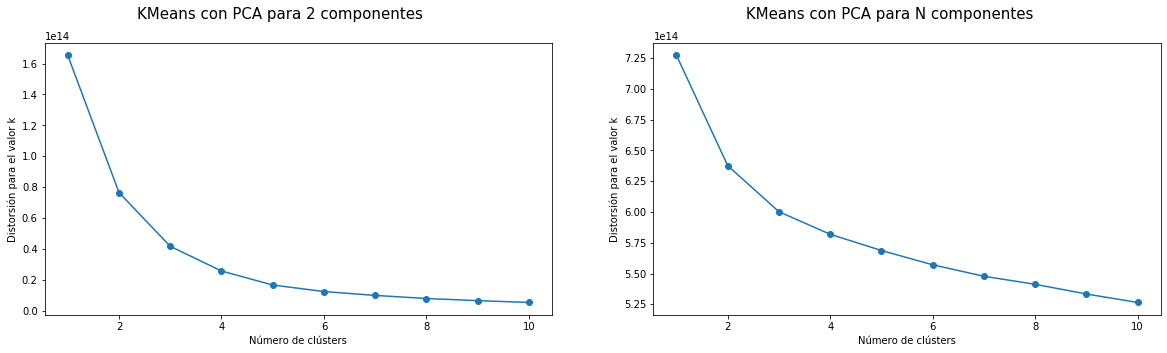

In [22]:
plt.figure(figsize=(20, 5))

# plot the Elbow Method with PCA2**************************************************************
plt.subplot(121)
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcatransformXff2)
    distortions.append(km.inertia_)
    
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clústers')
plt.ylabel('Distorsión para el valor k')

# plot the Elbow Method with PCAN**************************************************************
plt.subplot(122)
# calculate distortion for a range of number of cluster
distortionsN = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcatransformXff2N)
    distortionsN.append(km.inertia_)
    
# plot
plt.plot(range(1, 11), distortionsN, marker='o')
plt.xlabel('Número de clústers')
plt.ylabel('Distorsión para el valor k')

plt.suptitle('KMeans con PCA para 2 componentes' + '                                                                    ' + 'KMeans con PCA para N componentes', fontsize=15)
plt.show()

## 4.5- Aplicando el método de silueta para analizar la distancia de separación entre los clústers resultantes y el número óptimo de clúster K para aplicar las KMeans

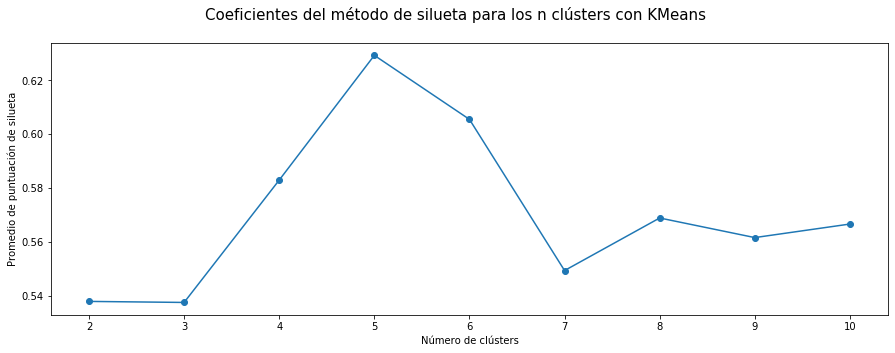

In [23]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(15, 5))

# plot the Silhouette Method with PCA2**************************************************************
plt.subplot(111)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avgs = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pcatransformXff2)
    silhouette_avg = silhouette_score(pcatransformXff2, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
# plot
plt.plot(range(2, 11), silhouette_avgs, marker='o')
plt.xlabel('Número de clústers')
plt.ylabel('Promedio de puntuación de silueta')

plt.suptitle('Coeficientes del método de silueta para los n clústers con KMeans', fontsize=15)
plt.show()

# 5- Aplicando agrupamiento con el método de Gaussianas

In [24]:
from sklearn.mixture import GaussianMixture

## 5.1- Gaussianas sobre el resultado de PCA para 2 componentes

In [25]:
gmm = GaussianMixture(n_components=5, random_state=0)
labels = gmm.fit_predict(pcatransformXff2)

## 5.2- Gaussianas sobre el resultado de PCA para todos los componentes

In [26]:
gmmN = GaussianMixture(random_state=0)
labelsN = gmmN.fit_predict(pcatransformXff2N)

## 5.3- Graficando método de Gaussianas para 2 componentes y para todos los componentes

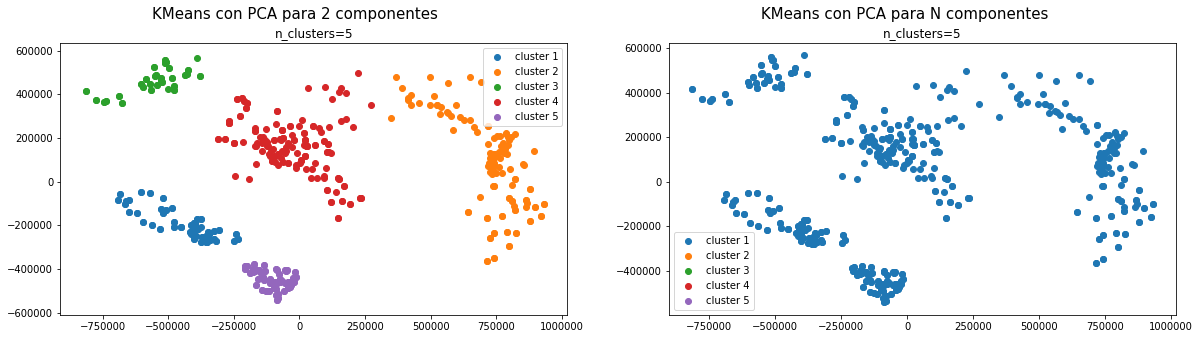

In [27]:
plt.figure(figsize=(20, 5))

# plot the Gaussian Mixture with PCA2**************************************************************
plt.subplot(121)
plt.scatter(
    pcatransformXff2[labels == 0, 0], pcatransformXff2[labels == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2[labels == 1, 0], pcatransformXff2[labels == 1, 1],
    label='cluster 2'
)

plt.scatter(
    pcatransformXff2[labels == 2, 0], pcatransformXff2[labels == 2, 1],
    label='cluster 3'
)

plt.scatter(
    pcatransformXff2[labels == 3, 0], pcatransformXff2[labels == 3, 1],
    label='cluster 4'
)

plt.scatter(
    pcatransformXff2[labels == 4, 0], pcatransformXff2[labels == 4, 1],
    label='cluster 5'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=5")

# plot the Gaussian Mixture with PCAN**************************************************************
plt.subplot(122)
plt.scatter(
    pcatransformXff2N[labelsN == 0, 0], pcatransformXff2N[labelsN == 0, 1],
    label='cluster 1'
)

plt.scatter(
    pcatransformXff2N[labelsN == 1, 0], pcatransformXff2N[labelsN == 1, 1],
    label='cluster 2'
)

plt.scatter(
    pcatransformXff2N[labelsN == 2, 0], pcatransformXff2N[labelsN == 2, 1],
    label='cluster 3'
)

plt.scatter(
    pcatransformXff2N[labelsN == 3, 0], pcatransformXff2N[labelsN == 3, 1],
    label='cluster 4'
)

plt.scatter(
    pcatransformXff2N[labelsN == 4, 0], pcatransformXff2N[labelsN == 4, 1],
    label='cluster 5'
)
plt.legend(scatterpoints=1)
plt.title("n_clusters=5")

plt.suptitle('KMeans con PCA para 2 componentes' + '                                                                    ' + 'KMeans con PCA para N componentes', fontsize=15)
plt.show()

In [28]:
gmmN = GaussianMixture(n_components=5, random_state=0)
labelsN = gmmN.fit_predict(pcatransformXff2N)

ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

## 5.4- Aplicando el método de silueta para analizar la distancia de separación entre los clústers resultantes y el número óptimo de clúster K para aplicar método de Gaussianas

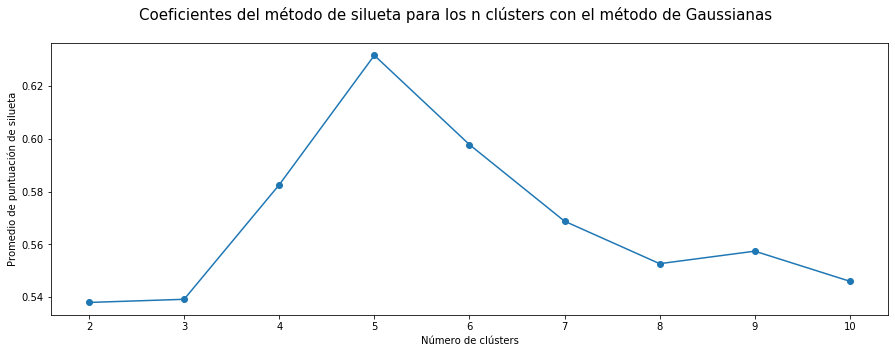

In [29]:
plt.figure(figsize=(15, 5))

# plot the Silhouette Method with PCA2**************************************************************
plt.subplot(111)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avgsGaussianMixture = []

for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pcatransformXff2)
    silhouette_avg = silhouette_score(pcatransformXff2, cluster_labels)
    silhouette_avgsGaussianMixture.append(silhouette_avg)
    
# plot
plt.plot(range(2, 11), silhouette_avgsGaussianMixture, marker='o')
plt.xlabel('Número de clústers')
plt.ylabel('Promedio de puntuación de silueta')

plt.suptitle('Coeficientes del método de silueta para los n clústers con el método de Gaussianas', fontsize=15)
plt.show()

# 6- Tomando imágenes prototipos de cada clúster formado a partir del método de Gaussianas

## 6.1- Obteniendo las probabilidades de cada imagen para cada uno de los clústers

In [30]:
probs = gmm.predict_proba(pcatransformXff2)

## 6.2- Obteniendo por cada clúster las imágenes más representativas

Tuple of arrays returned 0 :  (array([195, 399], dtype=int64), array([0, 0], dtype=int64))
Porb :  0.9999999913599673
Tuple of arrays returned 1 :  (array([466], dtype=int64), array([1], dtype=int64))
Porb :  0.9999999997778062
Tuple of arrays returned 2 :  (array([ 28, 232], dtype=int64), array([2, 2], dtype=int64))
Porb :  0.9999961072619309
Tuple of arrays returned 3 :  (array([ 30,  31,  32,  33,  54,  55,  64,  65,  66,  67, 234, 235, 236,
       237, 259, 269, 270, 271, 272, 408, 409, 410, 411, 430, 431, 432,
       433, 434, 435, 436, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64))
Porb :  1.0
Tuple of arrays returned 4 :  (array([ 82, 310], dtype=int64), array([4, 4], dtype=int64))
Porb :  0.9999992235086624


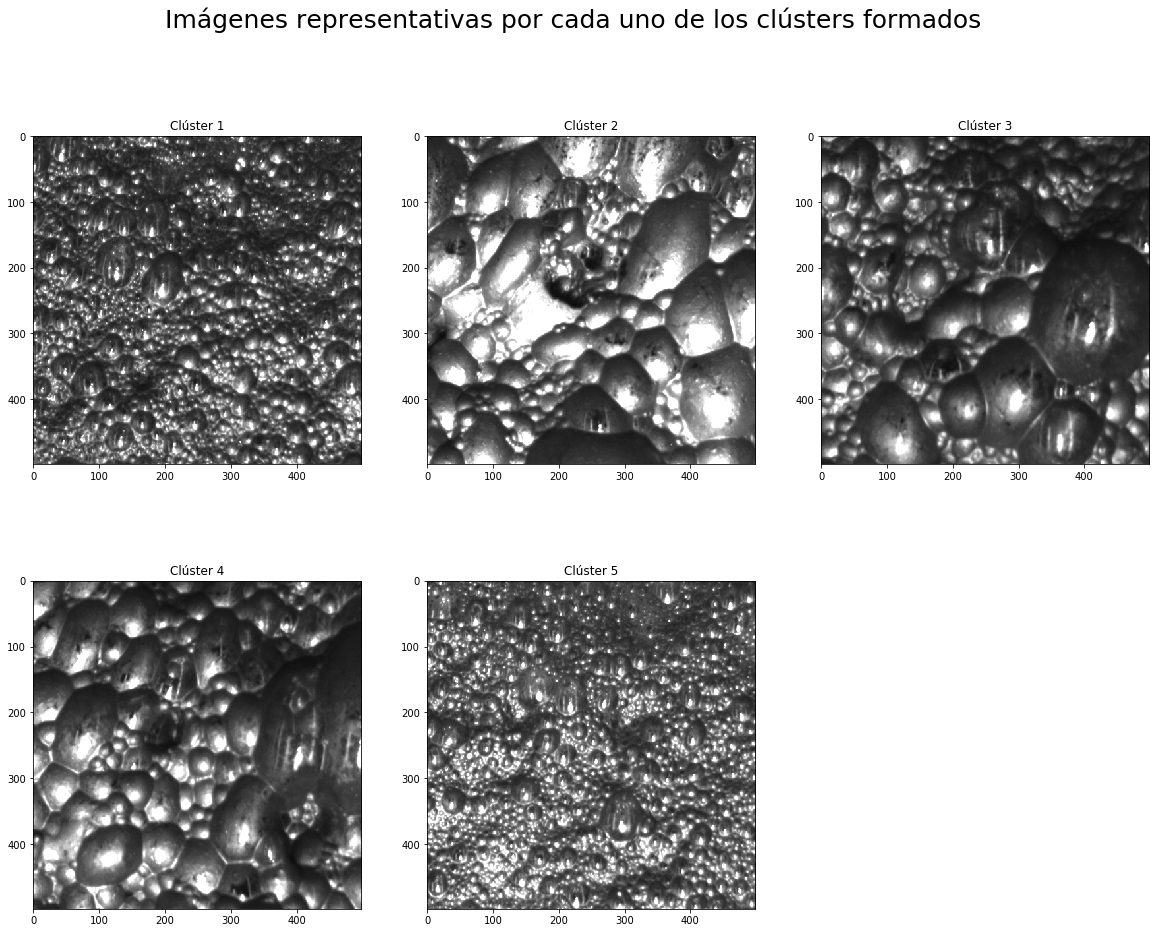

In [31]:
result0 = np.where(probs == probs[:,0].max())
print('Tuple of arrays returned 0 : ', result0)
print('Porb : ', probs[:,0].max())
result1 = np.where(probs == probs[:,1].max())
print('Tuple of arrays returned 1 : ', result1)
print('Porb : ', probs[:,1].max())
result2 = np.where(probs == probs[:,2].max())
print('Tuple of arrays returned 2 : ', result2)
print('Porb : ', probs[:,2].max())
result3 = np.where(probs == probs[:,3].max())
print('Tuple of arrays returned 3 : ', result3)
print('Porb : ', probs[:,3].max())
result4 = np.where(probs == probs[:,4].max())
print('Tuple of arrays returned 4 : ', result4)
print('Porb : ', probs[:,4].max())

plt.figure(figsize=(20, 15))

plt.subplot(231)
plt.imshow(collection[result0[0][0]])
plt.title("Clúster 1")

plt.subplot(232)
plt.imshow(collection[result1[0][0]])
plt.title("Clúster 2")

plt.subplot(233)
plt.imshow(collection[result2[0][0]])
plt.title("Clúster 3")

plt.subplot(234)
plt.imshow(collection[result3[0][0]])
plt.title("Clúster 4")

plt.subplot(235)  
plt.imshow(collection[result4[0][0]])
plt.title("Clúster 5")

plt.suptitle('Imágenes representativas por cada uno de los clústers formados', fontsize=25)
plt.show()

## 6.3- Guardando las imágenes por los clústers formados

In [32]:
from skimage.io import imsave

i=0
for p in probs:
    c = np.where(probs[i] == probs[i].max())[0].item()
    if c == 0: imsave('C:\\Users\\nelso\\Google Drive\\JupiterNotebooks\\tesis\\images_clusters\\cluster 1\\{}.png'.format(i+1),collection[i])
    if c == 1: imsave('C:\\Users\\nelso\\Google Drive\\JupiterNotebooks\\tesis\\images_clusters\\cluster 2\\{}.png'.format(i+1),collection[i])
    if c == 2: imsave('C:\\Users\\nelso\\Google Drive\\JupiterNotebooks\\tesis\\images_clusters\\cluster 3\\{}.png'.format(i+1),collection[i])
    if c == 3: imsave('C:\\Users\\nelso\\Google Drive\\JupiterNotebooks\\tesis\\images_clusters\\cluster 4\\{}.png'.format(i+1),collection[i])
    if c == 4: imsave('C:\\Users\\nelso\\Google Drive\\JupiterNotebooks\\tesis\\images_clusters\\cluster 5\\{}.png'.format(i+1),collection[i])
    i+=1